<a href="https://colab.research.google.com/github/djbiega/Convex-Optimization/blob/Formatting-Updates/AAE561_HW1_Biega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derek Biega AAE561 Homework 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy.linalg import inv
from scipy.optimize import minimize
from timeit import Timer

### Define the given function, partial derivatives, inverse hessian matrix, and a magnitude function

In [0]:
# Note: a lambda function is an anonymous function useful for single-line expressions
f = lambda x: 100*np.square(x[1]-np.square(x[0])) + np.square((1-x[0]))
dfx1 = lambda x: -400*x[0]*x[1]+400*np.power(x[0],3)+2*x[0]-2
dfx2 = lambda x: 200*(x[1]-np.square(x[0]))
dfx = lambda x: np.array([dfx1(x), dfx2(x)], dtype='float32')
dfx11 = lambda x: -400*(x[1])+1200*np.square(x[0])+2
dfx12 = lambda x: -400*x[0]
dfx21 = lambda x: -400*x[0]
dfx22 = lambda x: 200
hessian = lambda x: np.array([[dfx11(x), dfx12(x)], [dfx21(x), dfx22(x)]], dtype='float32')
inv_hessian = lambda x: inv(hessian(x))
mag = lambda x: math.sqrt(sum(i**2 for i in x))

In [0]:
# Define the initial point, step size, alpha/beta constants, and initial gradient magnitude
x0 = np.array([[-1.1], [1.1]])
t0 = 1
alpha = .15 
beta = .7
count = 1
magnitude = mag(dfx(x0))

## Backtracking line search algorithm

<par>Note: the 'Solution' output is: f(x+t$\Delta$x) - f(x) - $\alpha$t$\nabla$f(x)<sup>T</sup>$\Delta$x where $\Delta$x is dependent on the algorithm. (e.g. $\Delta$x=-$\nabla$f(x) for gradient descent)

In [0]:
def backtrack(x, t, alpha, beta, deltaX):
  count = 1
  while f(x+t*deltaX) > f(x) + alpha*t*np.dot(np.transpose(dfx(x)), deltaX):
    t *= beta
    ############## Uncomment the code below to see each iteration ##########
    # print('''
    # ----- iteration {} -----
    # '''.format(count))
    # print('Solution: ', f(x+t*deltaX) - f(x) + alpha*t*np.dot(dfx(x), deltaX))
    ########################################################################
    count+=1
  return t

##  Gradient descent algorithm

In [5]:
# Run the backtracking line search algorithm to find the optimal step size
deltaX = -dfx(x0)
t = backtrack(x0, t0, alpha, beta, deltaX)
print('Final step size: ', t)

Final step size:  0.001139889518537313


In [0]:
def grad_descent(x, t, count, magnitude, deltaX):
  xvalues=[]
  gradvalues=[]
  fvalues=[]
  temp = np.zeros((2,1))
  
  while magnitude > .000005:
    
    # Store all values for each iteration
    xvalues.append(x)
    gradvalues.append(np.array([dfx1(x), dfx2(x)]))
    fvalues.append(f(x))
    
    # Gradient Descent algorithm
    deltaX = -dfx(x)
    temp=x+t*deltaX
    x = temp
    
    # Update the magnitude for the exit criterion
    magnitude = mag(deltaX)  
    
    # Track the number of iterations
    count+=1
    
  return xvalues, gradvalues, fvalues, count

In [0]:
# Inputs/Outputs for the gradient descent algorithm
xvalues, gradvalues, fvalues, iterations = grad_descent(x0, t, count, magnitude, deltaX)

### The final value of all outputs.
<par>xvalues := the set of variables being tested in each iteration, x<sub>1</sub> and x<sub>2</sub>   
  gradvalues := the set of partial derivatives in each iteration, $\frac{\partial f}{\partial x_1}$, $\frac{\partial f}{\partial x_2}$   
  fvalues := the result of the objective function with inputs x<sub>1</sub> and x<sub>2</sub> , f(x<sub>1</sub>,x<sub>2</sub>)
  
  final_grad_mag := The magnitude of the final gradient values, ||$\nabla$f(x)||
  
  

In [8]:
final_value = print('Final set of x values: \n', xvalues[-1])
final_grad = print('\nFinal gradient values: \n', gradvalues[-1])
final_f = print('\nFinal value of the object function with optimized inputs: \n', fvalues[-1])
final_grad_mag = print('\nFinal magnitude of the gradient with optimized inputs: \n', mag(dfx(xvalues[-1])))
total_iterations = print('\nTotal iterations: \n', iterations)

Final set of x values: 
 [[0.99999441]
 [0.9999888 ]]

Final gradient values: 
 [[-2.23151529e-06]
 [-4.47193578e-06]]

Final value of the object function with optimized inputs: 
 [3.1272034e-11]

Final magnitude of the gradient with optimized inputs: 
 4.997786556707155e-06

Total iterations: 
 24636


### 3D plot of Gradient Descent

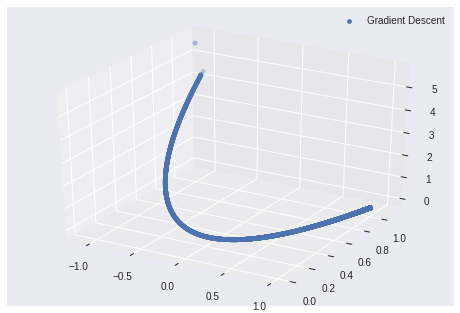

In [9]:
x = np.array([i[0] for i in xvalues])
y = np.array([i[1] for i in xvalues])
z = np.array(fvalues)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Gradient Descent')
ax.legend()

## Newton's Method

In [0]:
# Define the initial point, step size, alpha/beta constants, and initial gradient magnitude
x0 =np.array([[-1.1], [1.1]])
t0 = 1
alpha = .15 
beta = .7
count = 1
magnitude = mag(dfx(x0))

In [0]:
def newton(x, t, count, magnitude):
  xvalues=[]
  gradvalues=[]
  fvalues=[]
  temp = np.zeros((2,1))
  
  while magnitude > .000005:
    
    # Store all values for each iteration
    xvalues.append(x)
    gradvalues.append(dfx(x))
    fvalues.append(f(x))      
    
    # Newton method algorithm
    deltaX = np.array(np.dot(-inv_hessian(x), dfx(x)))
    temp = np.array(x+t*deltaX)
    x = temp
    magnitude = mag(deltaX)  
    
    # Track the number of iterations
    count+=1
    
  return xvalues, gradvalues, fvalues, count

In [0]:
xvalues, gradvalues, fvalues, iterations = newton(x0, t0, count, magnitude)

### The final value of all outputs

In [13]:
final_value = print('Final set of x values: \n', xvalues[-1])
final_grad = print('\nFinal gradient values: \n', gradvalues[-1])
final_f = print('\nFinal value of the object function with optimized inputs: \n', fvalues[-1])
final_grad_mag = print('\nFinal magnitude of the gradient with optimized inputs: \n', mag(dfx(xvalues[-1])))
total_iterations = print('\nTotal iterations: \n', iterations)

Final set of x values: 
 [[0.99999995]
 [0.99999987]]

Final gradient values: 
 [[ 9.1299416e-06]
 [-4.6193604e-06]]

Final value of the object function with optimized inputs: 
 [5.63044182e-14]

Final magnitude of the gradient with optimized inputs: 
 1.023202436743073e-05

Total iterations: 
 9


### 3D plot of Newton Method

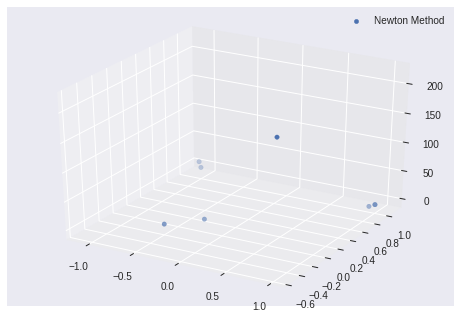

In [14]:
x = np.array([i[0] for i in xvalues])
y = np.array([i[1] for i in xvalues])
z = np.array(fvalues)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Newton Method')
ax.legend()

## Damped Newton's Method

In [0]:
# Define the initial point, step size, alpha/beta constants, and initial gradient magnitude
x0, t0, alpha, beta, count = np.array([[-1.1], [1.1]]), 1, .15, .7, 1
magnitude = mag(np.array([dfx1(x0), dfx2(x0)]))

Exact line search: t = $\frac{\nabla f(x_k)^T\nabla f(x_k)}{\nabla f(x_k)^TH_k\nabla f(x_k)}$



In [16]:
# Use Cauchy's step size (exact line search algorithm) 
t = np.dot(np.transpose(dfx(x0)),dfx(x0))/np.dot(np.dot(np.transpose(dfx(x0)),hessian(x0)),dfx(x0))
print('Final step size: ', t)

Final step size:  [[0.00082914]]


In [0]:
def damped_newton(x, t, count, magnitude):
  
  xvalues=[]
  gradvalues=[]
  fvalues=[]
  temp = np.zeros((2,1))
  
  while magnitude > .000005:
    
    # Store all values for each iteration
    xvalues.append(x)
    gradvalues.append(dfx(x))
    fvalues.append(f(x))   
    
    # Damped newton method algorithm    
    deltaX = np.array(np.dot(-inv_hessian(x), dfx(x)))
    temp = np.array(x+t*deltaX)
    x = temp
    magnitude = mag(deltaX)   
    
    # Track the number of iterations
    count+=1
    
  return xvalues, gradvalues, fvalues, count

In [0]:
xvalues, gradvalues, fvalues, iterations = damped_newton(x0, t, count, magnitude)


### The final value of all outputs

In [19]:
final_value = print('Final set of x values: \n', xvalues[-1])
final_grad = print('\nFinal gradient values: \n', gradvalues[-1])
final_f = print('\nFinal value of the object function with optimized inputs: \n', fvalues[-1])
final_grad_mag = print('\nFinal magnitude of the gradient with optimized inputs: \n', mag(dfx(xvalues[-1])))
total_iterations = print('\nTotal iterations: \n', iterations)

Final set of x values: 
 [[0.99999777]
 [0.99999553]]

Final gradient values: 
 [[-2.0424147e-06]
 [-1.2111697e-06]]

Final value of the object function with optimized inputs: 
 [4.98716263e-12]

Final magnitude of the gradient with optimized inputs: 
 2.374529412023341e-06

Total iterations: 
 20443


### 3D plot of Damped Newton Method

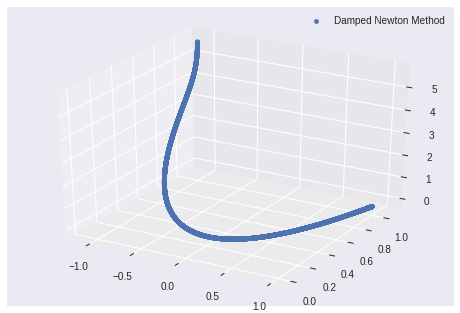

In [20]:
x = np.array([i[0] for i in xvalues])
y = np.array([i[1] for i in xvalues])
z = np.array(fvalues)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Damped Newton Method')
ax.legend()


## Quasi-Newton Method (BFGS)

To view the Hessian update used, I've uploaded a screenshot of the equation here: <https://imgur.com/a/hm6ibAl>

In [0]:
# Define the initial point, step size, alpha/beta constants, and initial gradient magnitude
x0, t0, alpha, beta, count = np.array([[-1.1], [1.1]]), 1, .15, .7, 1
magnitude = mag(dfx(x0))

In [22]:
# Use Cauchy's step size (exact line search algorithm) 
t = np.dot(np.transpose(dfx(x0)),dfx(x0))/np.dot(np.dot(np.transpose(dfx(x0)),hessian(x0)),dfx(x0))
print('Final step size: ', t)

Final step size:  [[0.00082914]]


In [0]:
def quasi_newton_BFGS(x, t, count, magnitude):
  
  xvalues=[]
  gradvalues=[]
  fvalues=[]
  temp = np.zeros((2,1))
  gamma = np.zeros((2,1))
  delta = np.zeros((2,1))
  htemp = np.zeros((2,2))
  hess = np.eye(2, dtype='float32')
  
  while magnitude > .000005:
    
    # Store all values for each iteration
    xvalues.append(x)
    gradvalues.append(dfx(x))
    fvalues.append(f(x))   
    
    # Quasi-Newton BFGS algorithm    
    deltaX = np.dot(-hess,dfx(x))
    p = t*deltaX 
    temp = x+t*deltaX
    q = dfx(temp)-dfx(x) 
    
    # T1-T4 are used to break down the Hessian update equation into smaller chunks
    T1=np.asscalar(1+np.divide(np.dot(np.dot(np.transpose(q),hess),q), np.dot(np.transpose(p),q)))
    T2=np.divide(np.dot(p,np.transpose(p)),np.dot(np.transpose(p),q))
    T3=np.dot(np.dot(p,np.transpose(q)), hess) + np.dot(np.dot(hess,q),np.transpose(p))
    T4=np.asscalar(np.dot(np.transpose(q),p))
    
    # Form and Update the Hessian
    htemp = hess + np.dot(T1,T2) - np.divide(T3,T4)
    x = temp
    hess = htemp  
    
    # Track the number of iterations    
    magnitude = mag(deltaX)    
    count+=1
    
  return xvalues, gradvalues, fvalues, count

In [0]:
xvalues, gradvalues, fvalues, iterations = quasi_newton_BFGS(x0, t, count, magnitude)

### The final value of all outputs

In [25]:
final_value = print('Final set of x values: \n', xvalues[-1])
final_grad = print('\nFinal gradient values: \n', gradvalues[-1])
final_f = print('\nFinal value of the object function with optimized inputs: \n', fvalues[-1])
final_grad_mag = print('\nFinal magnitude of the gradient with optimized inputs: \n', mag(dfx(xvalues[-1])))
total_iterations = print('\nTotal iterations: \n', iterations)

Final set of x values: 
 [[0.99999777]
 [0.99999553]]

Final gradient values: 
 [[-1.3875951e-06]
 [-1.5382029e-06]]

Final value of the object function with optimized inputs: 
 [4.98772596e-12]

Final magnitude of the gradient with optimized inputs: 
 2.0715908392950704e-06

Total iterations: 
 17759


### 3D plot of Quasi-Newton Method: BFGS

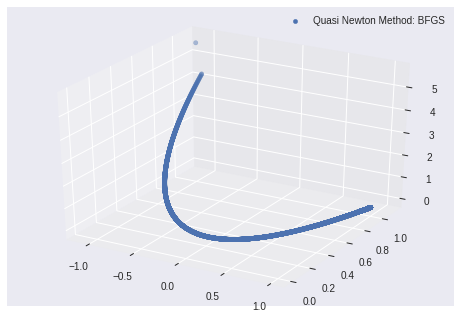

In [26]:
x = np.array([i[0] for i in xvalues])
y = np.array([i[1] for i in xvalues])
z = np.array(fvalues)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Quasi Newton Method: BFGS')
ax.legend()

#### BFGS can also be solved easily using minimize from scipy.optimize

A list of all methods available in scipy.optimize.minimize can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html "scipy.optimize.minimize documentation")

In [27]:
solution = minimize(f,x0,method='BFGS')
print(solution)

      fun: 1.9012509931293036e-11
 hess_inv: array([[0.47945977, 0.95633838],
       [0.95633838, 1.91221642]])
      jac: array([-4.75642811e-06,  2.49594776e-06])
  message: 'Optimization terminated successfully.'
     nfev: 164
      nit: 33
     njev: 41
   status: 0
  success: True
        x: array([0.99999564, 0.99999128])


## Quasi-Newton Method (DFP)

To view the Hessian update used, I've uploaded a screenshot of the equation here: https://imgur.com/a/rGPmSvQ

In [0]:
# Define the initial point, step size, alpha/beta constants, and initial gradient magnitude
x0, t0, alpha, beta, count = np.array([[-1.1], [1.1]]), 1, .15, .7, 1
magnitude = mag(dfx(x0))

In [29]:
# Use Cauchy's step size (exact line search algorithm) 
t = np.dot(np.transpose(dfx(x0)),dfx(x0))/np.dot(np.dot(np.transpose(dfx(x0)),hessian(x0)),dfx(x0))
print('Final step size: ', t)

Final step size:  [[0.00082914]]


In [0]:
def quasi_newton_DFP(x, t, count, magnitude):
  
  xvalues=[]
  gradvalues=[]
  fvalues=[]
  temp = np.zeros((2,1))
  gamma = np.zeros((2,1))
  delta = np.zeros((2,1))
  htemp = np.zeros((2,2))
  hess = np.eye(2, dtype='float32')
  
  while magnitude > .000005:
    
    # Store all values for each iteration
    xvalues.append(x)
    gradvalues.append(dfx(x))
    fvalues.append(f(x))   
    
    # Quasi-Newton DFP algorithm    
    deltaX = np.dot(-hess,dfx(x))
    p = t*deltaX 
    temp = x+t*deltaX
    q = dfx(temp)-dfx(x) 
    
    # T1-T3 are used to break down the Hessian update equation into smaller chunks
    T1=np.divide(np.dot(p,np.transpose(p)),np.dot(np.transpose(p),q))
    T2=np.dot(hess,np.dot(q,np.dot(np.transpose(q),hess)))
    T3=np.asscalar(np.dot(np.dot(np.transpose(q),hess),q))
   
    htemp = hess + T1-np.divide(T2,T3)
    x = temp
    hess = htemp   
    magnitude = mag(deltaX)   
    
    # Track the number of iterations
    count+=1
    
  return xvalues, gradvalues, fvalues, count

In [0]:
xvalues, gradvalues, fvalues, iterations = quasi_newton_DFP(x0, t, count, magnitude)

### The final value of all outputs

In [32]:
final_value = print('Final set of x values: \n', xvalues[-1])
final_grad = print('\nFinal gradient values: \n', gradvalues[-1])
final_f = print('\nFinal value of the object function with optimized inputs: \n', fvalues[-1])
final_grad_mag = print('\nFinal magnitude of the gradient with optimized inputs: \n', mag(dfx(xvalues[-1])))
total_iterations = print('\nTotal iterations: \n', iterations)

Final set of x values: 
 [[0.99999777]
 [0.99999553]]

Final gradient values: 
 [[ 5.070640e-06]
 [-4.760404e-06]]

Final value of the object function with optimized inputs: 
 [5.00760541e-12]

Final magnitude of the gradient with optimized inputs: 
 6.955058124599126e-06

Total iterations: 
 23151


### 3D plot of Quasi-Newton Method: DFP


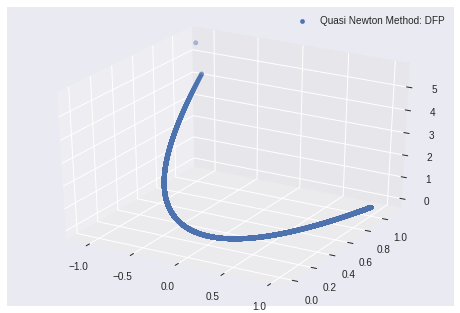

In [33]:
x = np.array([i[0] for i in xvalues])
y = np.array([i[1] for i in xvalues])
z = np.array(fvalues)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Quasi Newton Method: DFP')
ax.legend()